##### Big Data Mart Sales Problem - Vinayak Ratan

Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
bdm_df = pd.read_csv(r'G:\AI Professional\Data Trained\Notes\Github docs\Datasets\bigdatamart_rep-master\bigdatamart_rep-master\bigdatamart_Train.csv')
bdm_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
bdm_df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [4]:
bdm_df.sample()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2035,FDA38,NaN,Low Fat,0.044612,Dairy,241.1538,OUT019,1985,Small,Tier 1,Grocery Store,480.7076


In [5]:
bdm_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
bdm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Exploratory Data Analysis

In [7]:
bdm_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
# Checking for unique values of categorical variables
# Creating a list of categorical variables

big_mart_cat = ['Item_Identifier','Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']

for uq in range(len(big_mart_cat)):
    uniq_big_mart = bdm_df[big_mart_cat[uq]].unique()
    print(f'Unique values for {big_mart_cat[uq]}: {uniq_big_mart}')
    print(f"--------- Description of {big_mart_cat[uq]} categorical variable ----------")
    new_bdm = pd.Categorical(bdm_df[big_mart_cat[uq]])
    print(new_bdm.describe())
    print('\n')

Unique values for Item_Identifier: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
--------- Description of Item_Identifier categorical variable ----------
            counts     freqs
categories                  
DRA12            6  0.000704
DRA24            7  0.000821
DRA59            8  0.000939
DRB01            3  0.000352
DRB13            5  0.000587
...            ...       ...
NCZ30            7  0.000821
NCZ41            5  0.000587
NCZ42            5  0.000587
NCZ53            5  0.000587
NCZ54            7  0.000821

[1559 rows x 2 columns]


Unique values for Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
--------- Description of Item_Fat_Content categorical variable ----------
            counts     freqs
categories                  
LF             316  0.037076
Low Fat       5089  0.597090
Regular       2889  0.338965
low fat        112  0.013141
reg            117  0.013728


Unique values for Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Veget

In [9]:
#replacing low fat and LF with Low Fat
bdm_df["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)
bdm_df["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)

In [10]:
#replacing reg with Regular
bdm_df["Item_Fat_Content"].replace("reg","Regular",inplace=True)

In [11]:
bdm_df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Checking for null values

In [12]:
bdm_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
# We have missing values in Item weight. We cannot directly replace them with mean of that column. 
# We need to group it with item type and replace the missing values with mean of each item type 
item_weight_mean = bdm_df.groupby('Item_Type')
item_weight_mean.mean()['Item_Weight']

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [14]:
bdm_df['Item_Weight'].fillna(bdm_df.groupby('Item_Type')['Item_Weight'].transform('mean'), inplace = True)

In [15]:
bdm_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.39500,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.98788,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [16]:
bdm_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
bdm_df['Outlet_Size'].fillna(bdm_df['Outlet_Size'].mode()[0], inplace=True)

In [18]:
bdm_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

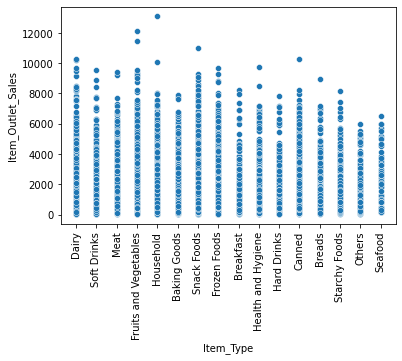

In [19]:
plt.xticks(rotation='vertical')
sns.scatterplot(x = 'Item_Type',y = 'Item_Outlet_Sales', data = bdm_df)

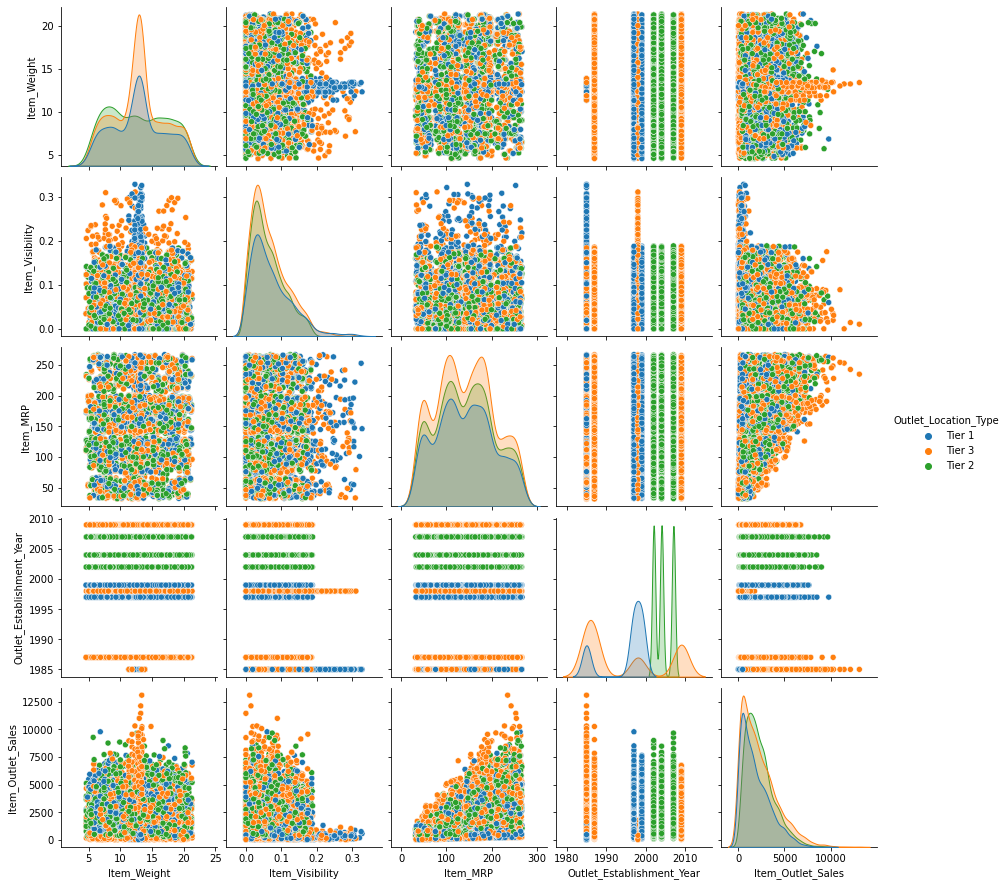

In [20]:
sns.pairplot(bdm_df, hue = 'Outlet_Location_Type')

In [21]:
# Creating two separate list of object data tpye and numerical data type varibales
object_bdm = ['Item_Fat_Content','Item_Type', 'Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
integer_bdm = ['Item_Weight', 'Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Su

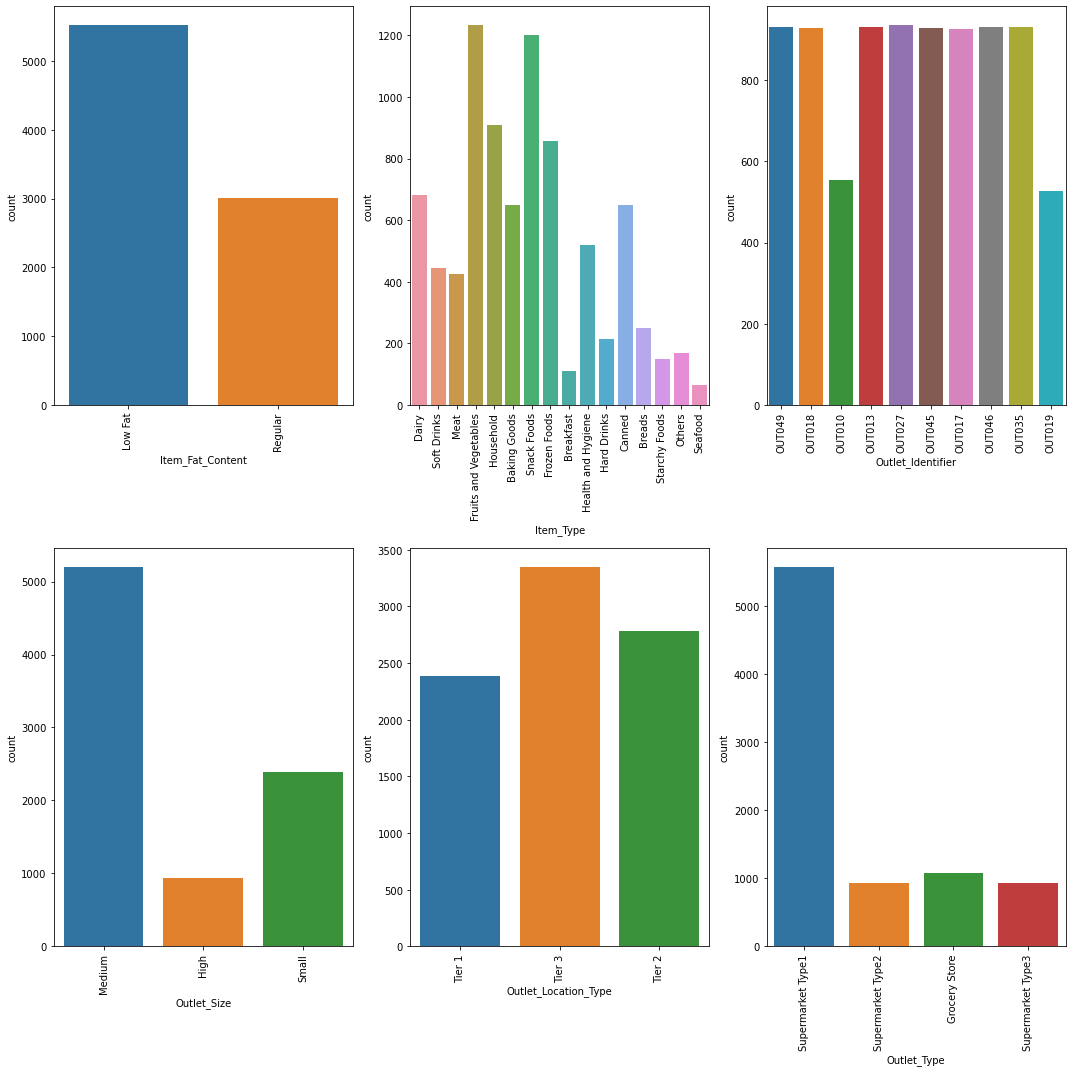

In [22]:
plt.figure(figsize=(15,15), facecolor ='white')
plot_no = 1

for c in object_bdm:
    if plot_no <= 6:
        ax = plt.subplot(2,3,plot_no)
        plt.xticks(rotation='vertical')
        sns.countplot(x = c, data = bdm_df)
        print(bdm_df[c].value_counts())
    plot_no += 1

plt.tight_layout()

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

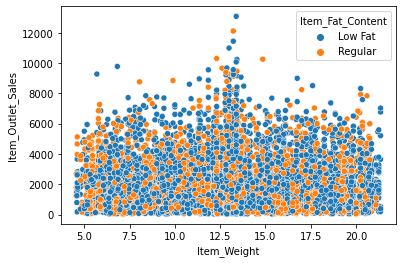

In [23]:
sns.scatterplot(x = 'Item_Weight', y = 'Item_Outlet_Sales', data = bdm_df, hue = 'Item_Fat_Content')

- Irrespective of low or regular fat or even item weight sales of the outlet increases

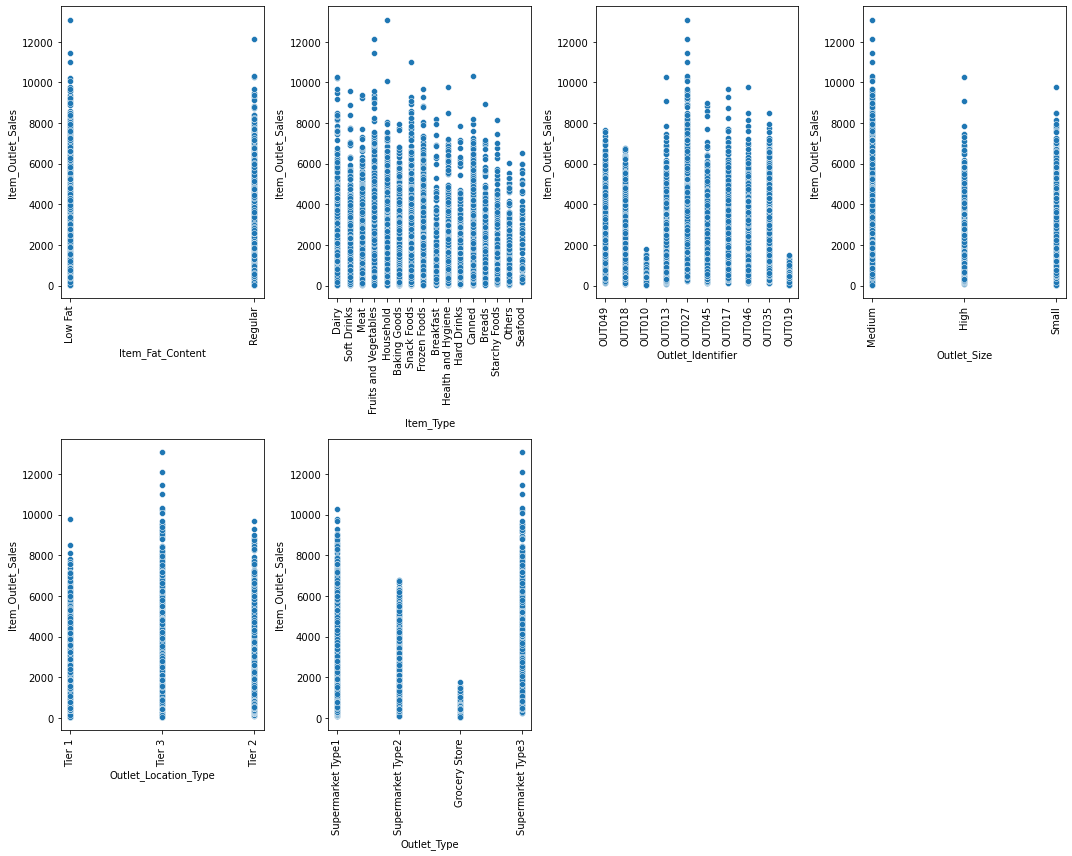

In [24]:
plt.figure(figsize=(15,12), facecolor ='white')
plot_no = 1

for c in object_bdm:
    if plot_no <= 7:
        ax = plt.subplot(2,4,plot_no)
        plt.xticks(rotation='vertical')
        sns.scatterplot(x = c,y = 'Item_Outlet_Sales', data = bdm_df)
    plot_no += 1

plt.tight_layout()

- Sales in outlet 10 and 19 are low compared to others

In [25]:
# Data was collected in 2013, Lets modify the years column with 2013 - established year to know how old the outlet is
bdm_df['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [26]:
Outlet_years = []
for year in bdm_df['Outlet_Establishment_Year']:
    diff = 2013 - year
    Outlet_years.append(diff)

Outlet_years

[14,
 4,
 14,
 15,
 26,
 4,
 26,
 28,
 11,
 6,
 14,
 16,
 14,
 16,
 26,
 16,
 4,
 14,
 28,
 9,
 26,
 28,
 9,
 28,
 16,
 6,
 9,
 26,
 15,
 28,
 15,
 4,
 4,
 11,
 16,
 14,
 28,
 4,
 28,
 28,
 16,
 26,
 14,
 4,
 26,
 15,
 11,
 11,
 16,
 28,
 16,
 26,
 26,
 6,
 6,
 4,
 11,
 14,
 16,
 28,
 4,
 11,
 28,
 28,
 28,
 15,
 9,
 11,
 11,
 16,
 16,
 26,
 11,
 6,
 14,
 16,
 14,
 28,
 6,
 11,
 16,
 16,
 4,
 28,
 28,
 6,
 9,
 28,
 16,
 14,
 15,
 14,
 11,
 9,
 9,
 28,
 14,
 9,
 28,
 16,
 11,
 28,
 14,
 26,
 4,
 26,
 26,
 11,
 28,
 26,
 16,
 6,
 28,
 28,
 11,
 14,
 6,
 9,
 6,
 4,
 6,
 11,
 15,
 9,
 6,
 9,
 16,
 6,
 26,
 11,
 28,
 16,
 28,
 15,
 4,
 16,
 28,
 11,
 6,
 15,
 9,
 6,
 11,
 14,
 9,
 14,
 9,
 9,
 9,
 9,
 6,
 4,
 4,
 28,
 16,
 4,
 4,
 6,
 6,
 26,
 26,
 28,
 4,
 16,
 16,
 6,
 6,
 4,
 28,
 4,
 9,
 6,
 26,
 26,
 15,
 15,
 11,
 15,
 28,
 11,
 28,
 11,
 28,
 26,
 28,
 4,
 28,
 14,
 11,
 14,
 14,
 14,
 11,
 4,
 28,
 16,
 16,
 14,
 28,
 28,
 11,
 9,
 11,
 28,
 16,
 15,
 14,
 11,
 28,
 15,
 9,
 9,
 6,


In [27]:
bdm_df['Outlet_Establishment_Year'] = Outlet_years

In [28]:
bdm_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,15,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052


In [29]:
# Finding the oldest outlet
np.where(bdm_df['Outlet_Establishment_Year'] == max(bdm_df['Outlet_Establishment_Year']))

(array([   7,   18,   21, ..., 8488, 8490, 8504], dtype=int64),)

In [30]:
bdm_df.loc[np.where(bdm_df['Outlet_Establishment_Year'] == max(bdm_df['Outlet_Establishment_Year']))]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,12.987880,Low Fat,0.127470,Snack Foods,107.7622,OUT027,28,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,11.400328,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,28,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,12.277108,Regular,0.035400,Baking Goods,144.5444,OUT027,28,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,12.277108,Low Fat,0.057557,Baking Goods,107.6938,OUT019,28,Small,Tier 1,Grocery Store,214.3876
29,FDC14,12.305705,Regular,0.072222,Canned,43.6454,OUT019,28,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,11.847460,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,28,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,11.847460,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,28,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,13.853285,Low Fat,0.091473,Others,184.6608,OUT027,28,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,13.224769,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,28,Small,Tier 1,Grocery Store,487.3656


- Oldest outlet is 28 years old

#### Summary Statistics

In [31]:
bdm_df.describe(include = 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523,8523,8523.000000
unique,1559,NaN,2,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5517,NaN,1232,NaN,935,NaN,5203,3350,5577,NaN
mean,NaN,12.857890,NaN,0.066132,NaN,140.992782,NaN,15.168133,NaN,NaN,NaN,2181.288914
std,NaN,4.232804,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,4.000000,NaN,NaN,NaN,33.290000
25%,NaN,9.310000,NaN,0.026989,NaN,93.826500,NaN,9.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.867061,NaN,0.053931,NaN,143.012800,NaN,14.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.000000,NaN,0.094585,NaN,185.643700,NaN,26.000000,NaN,NaN,NaN,3101.296400


#### Correlation

In [32]:
bdm_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.011620,0.025821,0.008376,0.012088
Item_Visibility,-0.011620,1.000000,-0.001315,0.074834,-0.128625
Item_MRP,0.025821,-0.001315,1.000000,-0.005020,0.567574
Outlet_Establishment_Year,0.008376,0.074834,-0.005020,1.000000,0.049135
Item_Outlet_Sales,0.012088,-0.128625,0.567574,0.049135,1.000000


<AxesSubplot:>

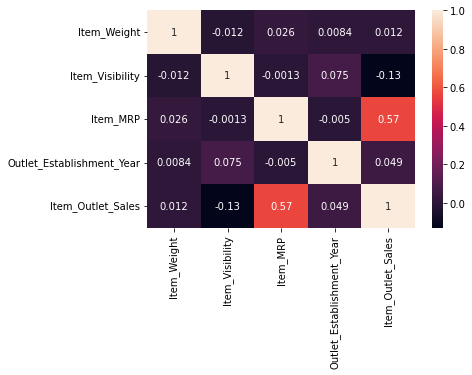

In [33]:
sns.heatmap(bdm_df.corr(), annot = True)

- Item MRP is the most correlated with target variable

#### Checking for skewness

In [34]:
bdm_df.skew()

Item_Weight                  0.089537
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year    0.396641
Item_Outlet_Sales            1.177531
dtype: float64

#### Checking for Outliers

Item_Weight                     AxesSubplot(0.125,0.536818;0.110714x0.343182)
Item_Visibility              AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Item_MRP                     AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Outlet_Establishment_Year    AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Item_Outlet_Sales            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
dtype: object

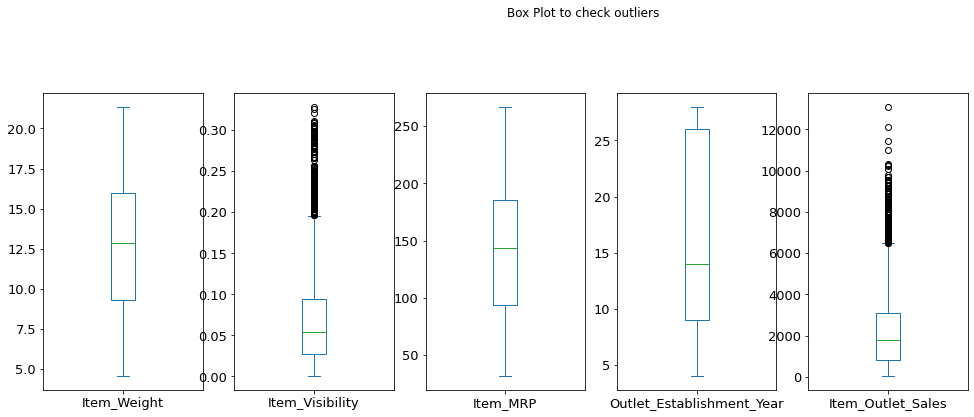

In [35]:
bdm_df.plot(kind='box', subplots = True, layout = (2,6), figsize = (20,12), title = "Box Plot to check outliers", fontsize = 13)

- Outliers are present

#### Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bdm_df['Item_Identifier']=le.fit_transform(bdm_df['Item_Identifier'])
bdm_df['Item_Fat_Content']=le.fit_transform(bdm_df['Item_Fat_Content'])
bdm_df['Item_Type']=le.fit_transform(bdm_df['Item_Type'])
bdm_df['Outlet_Identifier']=le.fit_transform(bdm_df['Outlet_Identifier'])
bdm_df['Outlet_Size']=le.fit_transform(bdm_df['Outlet_Size'])
bdm_df['Outlet_Location_Type']=le.fit_transform(bdm_df['Outlet_Location_Type'])
bdm_df['Outlet_Type']=le.fit_transform(bdm_df['Outlet_Type'])

In [37]:
from scipy.stats import zscore
z_big = np.abs(zscore(bdm_df))
z_big

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1.388514,0.840601,0.738147,0.970732,0.766479,1.747454,1.507813,0.139541,0.284581,1.369334,0.252658,0.910601
1,1.717991,1.639173,1.354743,0.908111,1.608963,1.489023,0.607071,1.334103,0.284581,1.091569,1.002972,1.018440
2,0.262057,1.096763,0.738147,0.956917,0.658786,0.010040,1.507813,0.139541,0.284581,1.369334,0.252658,0.049238
3,0.759769,1.498411,1.354743,1.281758,0.291391,0.660050,1.664513,0.020085,0.284581,1.091569,1.508289,0.849103
4,1.151580,0.928018,0.738147,1.281758,0.421242,1.399220,1.312032,1.293934,1.950437,1.091569,0.252658,0.695373
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.912107,1.415903,0.738147,0.181193,1.371418,1.180783,1.312032,1.293934,1.950437,1.091569,0.252658,0.349915
8519,0.261100,1.057964,1.354743,0.371154,1.716656,0.527301,0.802852,0.497909,0.284581,0.138882,0.252658,0.956402
8520,1.285152,0.533458,0.738147,0.599784,0.183698,0.897208,0.450371,0.736822,1.381274,0.138882,0.252658,0.579100
8521,0.219759,1.334392,1.354743,1.532880,1.371418,0.607977,0.607071,1.334103,0.284581,1.091569,1.002972,0.196725


In [38]:
np.where(z_big>3)

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
         456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
         991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
        1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
        1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
        2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
        3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
        3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
        4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
        4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
        5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
        5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
        6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
        6886, 6903, 6993, 7005, 7016, 

In [39]:
bdm_df_new = bdm_df[(z_big<3).all(axis=1)]
bdm_df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,14,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,4,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,14,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,15,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,26,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,26,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,11,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,9,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,4,1,2,2,1845.5976


In [40]:
# Checking the shape of the dataset before and after removing outliers
print("Old DataFrame:-", bdm_df.shape)
print("New DataFrame:-", bdm_df_new.shape)
print('Total dropped rows:-', bdm_df.shape[0]-bdm_df_new.shape[0])

Old DataFrame:- (8523, 12)
New DataFrame:- (8338, 12)
Total dropped rows:- 185


In [41]:
# Percentage loss of data
loss_percent_big = (8523-8338)/8338*100
print(loss_percent_big,'%')

2.2187574958023504 %


#### Splitting the data

In [42]:
X = bdm_df_new.iloc[:,:-1]
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,14,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,4,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,14,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,0,15,1,2,0
4,1297,8.93,0,0.000000,9,53.8614,1,26,0,2,1


In [43]:
X.shape

(8338, 11)

In [44]:
y = bdm_df_new.iloc[:,-1]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8338, dtype: float64

In [45]:
y.shape

(8338,)

#### Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X= scale.fit_transform(X)
X

array([[-1.38690137, -0.83586336, -0.73664489, ..., -0.27887393,
        -1.37034498, -0.25983859],
       [-1.71567222, -1.62953762,  1.35750619, ..., -0.27887393,
         1.09905991,  1.02213428],
       [-0.2628605 ,  1.08961858, -0.73664489, ..., -0.27887393,
        -1.37034498, -0.25983859],
       ...,
       [ 1.28102962, -0.53060403, -0.73664489, ...,  1.38320672,
        -0.13564253, -0.25983859],
       [-0.22065343, -1.32662644,  1.35750619, ..., -0.27887393,
         1.09905991,  1.02213428],
       [-1.62237238,  0.45561843, -0.73664489, ...,  1.38320672,
        -1.37034498, -0.25983859]])

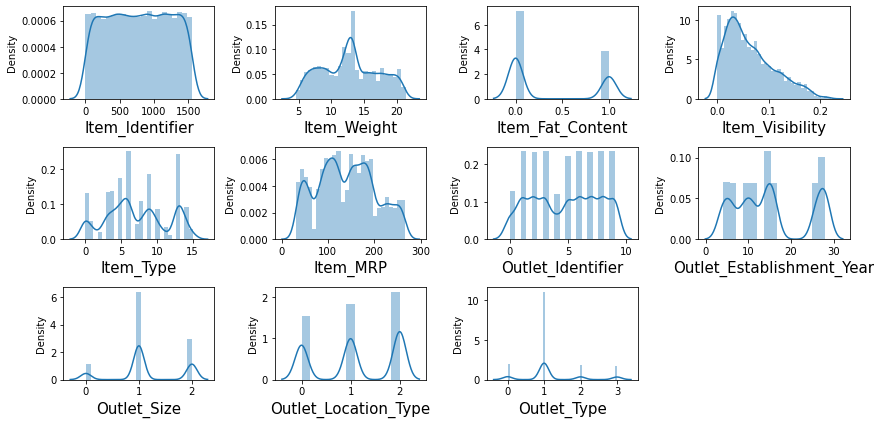

In [47]:
plt.figure(figsize=(12,6))
plot_no = 1
for column in bdm_df_new:
    if plot_no <= 11:
        ax = plt.subplot(3,4,plot_no)
        sns.distplot(bdm_df_new[column])
        plt.xlabel(column, fontsize = 15)

    plot_no += 1
plt.tight_layout()

### Model Building

In [48]:
# Importing the libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [49]:
# Instantiating each algorithm
lr_big = LinearRegression()
dtr_big = DecisionTreeRegressor()
knr_big = KNeighborsRegressor()
svr_big = SVR()
rfr_big = RandomForestRegressor()

# List of instantiated algorithms
algm_t = [lr_big, dtr_big, knr_big, svr_big, rfr_big]

In [50]:
# Maximum accuracy
maxAccu_big = 0 

# Best random state value for which accuracy is achieved 
maxRS_big = 0

for i in range(0,500):
    x_train, x_test,y_train, y_test = train_test_split(X,y, random_state=i, test_size=0.20)
    lr_big.fit(x_train, y_train)
    pred_train_big= lr_big.predict(x_train)
    pred_test_big= lr_big.predict(x_test)
    score_train_big = lr_big.score(x_train, y_train)
    score_test_big = lr_big.score(x_test, y_test)
    r2_lr_big = r2_score(y_test, pred_test_big)
    print(f'----------------At random State {i} ------------------')
    print(f"Training score is {score_train_big}")
    print(f"Testing score is {score_test_big}")
    print(f'r2 score of {lr_big} is {r2_lr_big}')
    
    if r2_lr_big > maxAccu_big:
        maxAccu_big = r2_lr_big
        maxRS_big = i
        print(f"Maximum score of {lr_big} is {r2_lr_big} at Random state {i}")
        print('\n')

----------------At random State 0 ------------------
Training score is 0.5021466281623255
Testing score is 0.4869752914664983
r2 score of LinearRegression() is 0.4869752914664983
Maximum score of LinearRegression() is 0.4869752914664983 at Random state 0


----------------At random State 1 ------------------
Training score is 0.4967176020208749
Testing score is 0.5093646156676368
r2 score of LinearRegression() is 0.5093646156676368
Maximum score of LinearRegression() is 0.5093646156676368 at Random state 1


----------------At random State 2 ------------------
Training score is 0.49977976921109024
Testing score is 0.49575377722313474
r2 score of LinearRegression() is 0.49575377722313474
----------------At random State 3 ------------------
Training score is 0.5044200983645859
Testing score is 0.4788129130981801
r2 score of LinearRegression() is 0.4788129130981801
----------------At random State 4 ------------------
Training score is 0.493719839941836
Testing score is 0.5181134515420378


- Best random state is 327

In [51]:
algm_big = [lr_big, dtr_big, knr_big, svr_big, rfr_big]

for m in algm_big:
    x_train, x_test,y_train, y_test = train_test_split(X,y, random_state=327, test_size=0.20)
    m.fit(x_train, y_train)
    pred_big =m.predict(x_test)
    print(f'----------------------Model results for {m} ------------------------')
    print(f'Score of {m} is {m.score(x_train, y_train)}')
    print(f'Testing Score of {m} is {m.score(x_test, y_test)}')
    print(f"R2 Score of {m} is  {r2_score(y_test, pred_big)}")
    print(f"Mean Squared error of {m} is {mean_squared_error(y_test, pred_big)}")
    print(f"Root Mean Squared error of {m} is {np.sqrt(mean_squared_error(y_test, pred_big))}")
    print('\n')

----------------------Model results for LinearRegression() ------------------------
Score of LinearRegression() is 0.48736411869584284
Testing Score of LinearRegression() is 0.5428328978510741
R2 Score of LinearRegression() is  0.5428328978510741
Mean Squared error of LinearRegression() is 1205789.2923987946
Root Mean Squared error of LinearRegression() is 1098.084373988991


----------------------Model results for DecisionTreeRegressor() ------------------------
Score of DecisionTreeRegressor() is 1.0
Testing Score of DecisionTreeRegressor() is 0.20616022475803786
R2 Score of DecisionTreeRegressor() is  0.20616022475803786
Mean Squared error of DecisionTreeRegressor() is 2093771.6129784137
Root Mean Squared error of DecisionTreeRegressor() is 1446.987081137359


----------------------Model results for KNeighborsRegressor() ------------------------
Score of KNeighborsRegressor() is 0.6615469400422003
Testing Score of KNeighborsRegressor() is 0.5288010244321256
R2 Score of KNeighborsReg

- Random Forest Regressor is giving the best results

#### Cross Validation of Each Model

In [52]:
# Before checking all the models we will identify best 'cv' value using Linear Regression 
from sklearn.model_selection import cross_val_score
max_cvscore_big = 0 
max_cv_big = 0
for j in range(2,15):
    cv_score_big = cross_val_score(lr_big, X,y,cv=j)
    cv_mean_big = cv_score_big.mean()
    print(f"At cross fold {j} the cv score is {cv_mean_big}")
    print('\n') 
    
    if cv_mean_big > max_cvscore_big:
        max_cvscore_big = cv_mean_big
        max_cv_big = j
        print(f"At cross fold {j} the Maximum CV score is {max_cvscore_big}")

At cross fold 2 the cv score is 0.4970597025144058


At cross fold 2 the Maximum CV score is 0.4970597025144058
At cross fold 3 the cv score is 0.4972917110675302


At cross fold 3 the Maximum CV score is 0.4972917110675302
At cross fold 4 the cv score is 0.4960868074513226


At cross fold 5 the cv score is 0.4970788791817761


At cross fold 6 the cv score is 0.4975057897739192


At cross fold 6 the Maximum CV score is 0.4975057897739192
At cross fold 7 the cv score is 0.4976772322595811


At cross fold 7 the Maximum CV score is 0.4976772322595811
At cross fold 8 the cv score is 0.49702860977283786


At cross fold 9 the cv score is 0.4972595799074527


At cross fold 10 the cv score is 0.49724812611072966


At cross fold 11 the cv score is 0.4973417118955048


At cross fold 12 the cv score is 0.49700175969283816


At cross fold 13 the cv score is 0.4959867780194219


At cross fold 14 the cv score is 0.49653642924962427




- Best cross validation at 7

In [53]:
# Using cross validation for all the models
# algm_big is a list containing the instance of all the models

for m_cv in algm_big:
    cv_score = cross_val_score(m_cv,X,y,cv=7)
    cv_mean = cv_score.mean()
    print('---------------------------------------------------')
    print(f"The cross validation score is {cv_mean} for {m_cv}")
    print('\n')

---------------------------------------------------
The cross validation score is 0.4976772322595811 for LinearRegression()


---------------------------------------------------
The cross validation score is 0.12820556610626915 for DecisionTreeRegressor()


---------------------------------------------------
The cross validation score is 0.4970083562312227 for KNeighborsRegressor()


---------------------------------------------------
The cross validation score is 0.058421250465476526 for SVR()


---------------------------------------------------
The cross validation score is 0.5414162585907139 for RandomForestRegressor()




- As we can even with cross validation the Random forest Regressor is having better score. Hence proceeding with Hyper parameter tuning using Random Forest Regressor

### Hyper Parameter tuning

In [57]:
# Tuning for Random Forest Regressor
from sklearn.model_selection import GridSearchCV

# creating parameter list for GridSearchCV
parameter_rf_big = {'n_estimators':[100],
                   'max_depth': [2,4],
                   'criterion': ['mse','mae'], 
                   'max_features':['sqrt','log2']}

In [58]:
grid_rfr = GridSearchCV(rfr_big,
                     parameter_rf_big,
                     cv=7)

In [59]:
# Training grid search 
grid_rfr.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100]})

In [60]:
# Getting the best parameters
grid_rfr.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [61]:
# Best Estimator
grid_rfr.best_estimator_

RandomForestRegressor(max_depth=4, max_features='sqrt')

In [62]:
grid_rfr_pred=grid_rfr.best_estimator_.predict(x_test)

print(f'Final Accuracy with {rfr_big}')
r2_score(y_test,grid_rfr_pred)

Final Accuracy with RandomForestRegressor()


0.51741910915784

##### Before pickling using the test data

In [63]:
bdm_df_test = pd.read_csv(r'G:\AI Professional\Data Trained\Notes\Github docs\Datasets\bigdatamart_rep-master\bigdatamart_rep-master\bigdatamart_Test.csv')
bdm_df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [64]:
#Checking null values in test data
bdm_df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [65]:
item_weight_mean = bdm_df_test.groupby('Item_Type')
item_weight_mean.mean()['Item_Weight']

Item_Type
Baking Goods             12.272418
Breads                   10.866799
Breakfast                13.759603
Canned                   12.393565
Dairy                    12.955040
Frozen Foods             12.101543
Fruits and Vegetables    13.146659
Hard Drinks              11.844417
Health and Hygiene       13.216929
Household                13.270504
Meat                     12.702148
Others                   14.009725
Seafood                  13.241136
Snack Foods              12.684256
Soft Drinks              11.691965
Starchy Foods            13.618247
Name: Item_Weight, dtype: float64

In [66]:
bdm_df_test['Item_Weight'].fillna(bdm_df_test.groupby('Item_Type')['Item_Weight'].transform('mean'), inplace = True)

In [67]:
bdm_df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.31500,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.95504,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [68]:
bdm_df_test['Outlet_Size'].fillna(bdm_df_test['Outlet_Size'].mode()[0], inplace=True)

In [69]:
bdm_df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.60000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.31500,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.95504,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [70]:
bdm_df_test["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)
bdm_df_test["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)
bdm_df_test["Item_Fat_Content"].replace("reg","Regular",inplace=True)

In [71]:
bdm_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

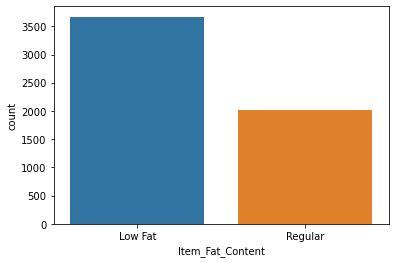

In [72]:
sns.countplot(bdm_df_test['Item_Fat_Content'])

In [73]:
# Label Encoding
bdm_df_test['Item_Identifier']=le.fit_transform(bdm_df_test['Item_Identifier'])
bdm_df_test['Item_Fat_Content']=le.fit_transform(bdm_df_test['Item_Fat_Content'])
bdm_df_test['Item_Type']=le.fit_transform(bdm_df_test['Item_Type'])
bdm_df_test['Outlet_Identifier']=le.fit_transform(bdm_df_test['Outlet_Identifier'])
bdm_df_test['Outlet_Size']=le.fit_transform(bdm_df_test['Outlet_Size'])
bdm_df_test['Outlet_Location_Type']=le.fit_transform(bdm_df_test['Outlet_Location_Type'])
bdm_df_test['Outlet_Type']=le.fit_transform(bdm_df_test['Outlet_Type'])

In [74]:
bdm_df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.75000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.30000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.60000,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.31500,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.95504,1,0.118599,4,234.2300,5,1985,1,2,3


#### Pickling

In [76]:
# Pickling of the file or serialization of a file
import joblib
joblib.dump(grid_rfr.best_estimator_,"BigMartSales.pkl")

['BigMartSales.pkl']

In [78]:
BigMartSales_model = joblib.load('BigMartSales.pkl')
BigMartSales_result = BigMartSales_model.score(x_test, y_test)
print(BigMartSales_result*100)

51.741910915784


#### Conclusion

In [79]:
BigMartSales_conclusion = pd.DataFrame([BigMartSales_model.predict(x_test),y_test], index=['Predicted', 'Original'])
BigMartSales_conclusion

,0,1,2,3,4,5,6,7,8,9,...,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667
Predicted,532.427728,1753.851767,3071.947416,3687.21273,1525.681092,1696.29089,2844.761883,2116.616277,2818.473616,493.59858,...,2875.331656,1977.685774,1440.515545,2043.661768,3683.591296,2947.998466,1461.326766,674.981625,1567.426673,3613.2102
Original,160.457800,1693.795200,1805.649600,2057.98780,958.752000,1884.87980,3861.640000,814.939200,2077.296000,487.36560,...,3231.127400,508.671200,1381.535000,2694.492600,3998.794800,3578.675000,828.921000,858.882000,735.709000,2106.5912


In [81]:
BigMartSales_y_test_conclusion = BigMartSales_model.predict(bdm_df_test)

In [82]:
BigMartSales_y_test_conclusion

array([3360.42540567, 3371.81874945, 3412.92413894, ..., 3372.80967307,
       3371.81874945, 3371.81874945])

In [83]:
y_df = pd.DataFrame(BigMartSales_y_test_conclusion)

In [84]:
y_df

,0
0,3360.425406
1,3371.818749
2,3412.924139
3,3372.809673
4,3513.768255
...,...
5676,3359.434482
5677,3513.768255
5678,3372.809673
5679,3371.818749


#### Thank You